In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRLN8-0LHCQfU8QwdFdgGb4t00vKrrmTkGgISDuX_boRMy5Y_p3G33qEB2C3R9qtQ/pub?gid=489447992&single=true&output=csv'

df = pd.read_csv(url, skiprows  = 3, decimal = ',', header = 1)
data_np = df.to_numpy()
data = np.delete(data_np, slice(0,5), axis=0)

In [3]:
"""
calcul des debits en litre / heure et litre / jour
"""
debit1_lph = []
for elem in data[:,4]:
    if elem == 0:
        debit = 0
    elif elem == 'nan':
        debit = 'nan'
    else:
        debit = 3600/elem # debit1 en litre/heure
    debit1_lph.append(debit)
debit1_lph = np.array(debit1_lph)

debit1_lpj = debit1_lph * 24 # debit1 en litre/jour


debit2_lph = []
for elem in data[:,10]:
    if elem == 0:
        debit = 0
    elif elem == 'nan':
        debit = 'nan'
    else:
        debit = 3600/elem
    debit2_lph.append(debit)
debit2_lph = np.array(debit2_lph)
debit2_lpj = debit2_lph * 24

"""
debit total
"""
debit_total_lpj = debit1_lpj + debit2_lpj # debit total captage 1 + captage 2 par jour

Text(2, 950, '8 pers. à 150 litres/jour/pers.')

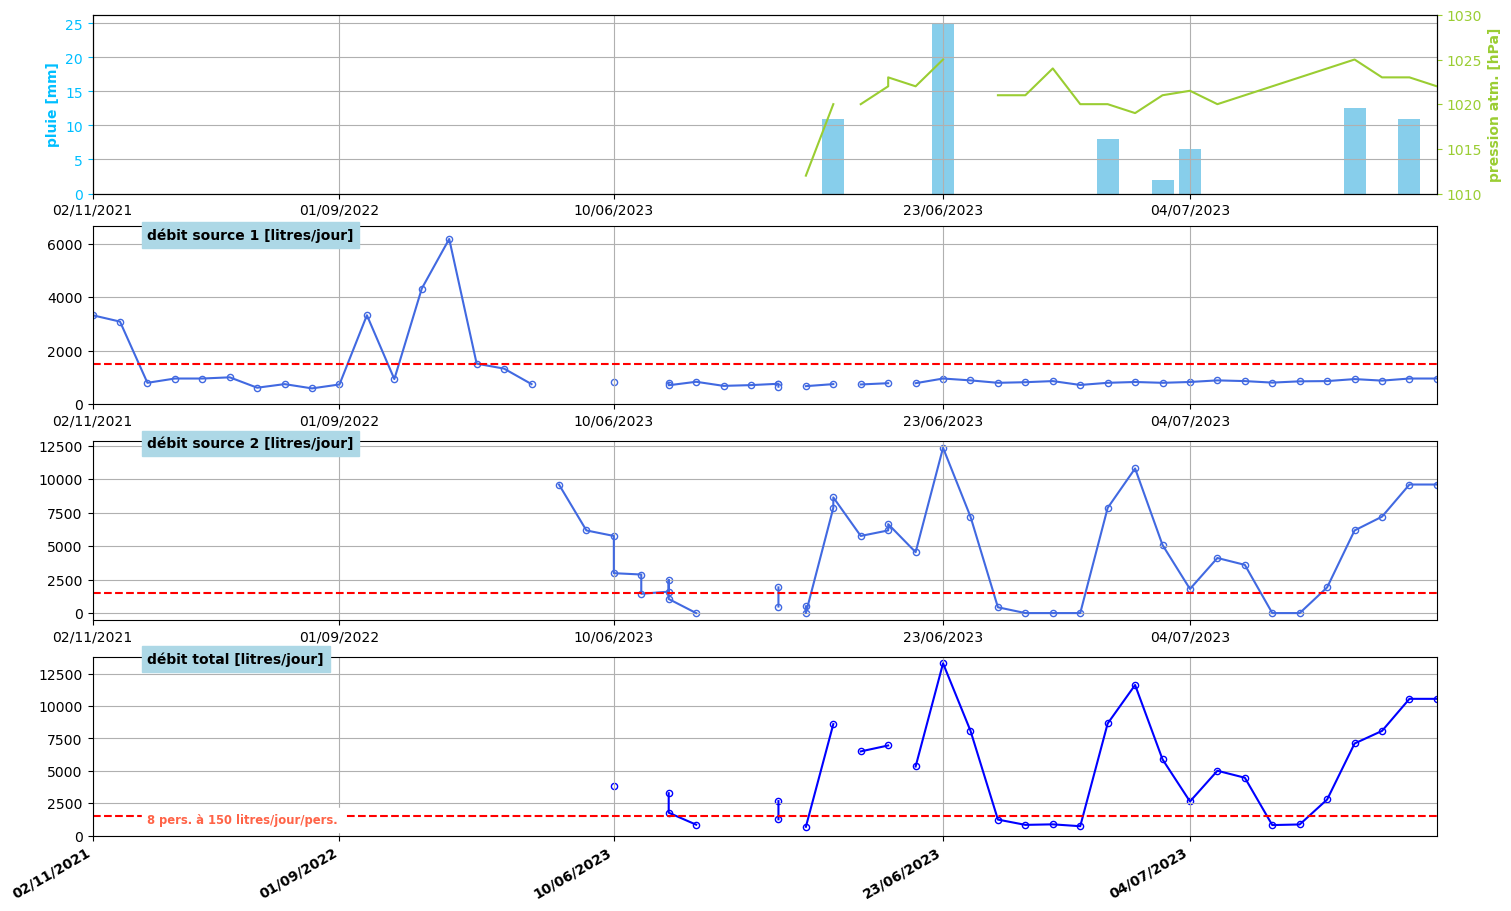

In [6]:
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
                                        FIGURE
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

fig, axs = plt.subplots(4, 1, figsize=(15, 9), layout='constrained')

"""
plot 1 pluie + pression
"""
ax = axs[0]
ax.grid(True)
ax.bar(data[:,3], data[:,12], color = 'skyblue') # pluie en mm
ax.set_ylabel('pluie [mm]', color = 'deepskyblue', fontweight = 'bold')
ax.set_xlim([data[0,3], data[-1,3]])
ax.tick_params(axis='y', colors='deepskyblue')


ax2 = ax.twinx()
ax2.plot(data[:,3], data[:,0], color = 'yellowgreen') # pression atmosphérique en HPa
#ax2.scatter(data[:,3], data[:,0], color = 'green')
ax2.set_ylabel('pression atm. [hPa]', color = 'yellowgreen', fontweight = 'bold')
ax2.set_ylim([1010,1030])
ax2.set_xlim([data[0,3], data[-1,3]])
ax2.tick_params(axis='y', colors='yellowgreen')

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1, 10, 20)))

ax.axes.get_xaxis().get_label().set_visible(False)

"""
debit source 1
"""
ax = axs[1]
ax.text(2,np.nanmax(debit1_lpj),'débit source 1 [litres/jour]', fontsize='medium', backgroundcolor = 'lightblue', fontweight = 'bold')

ax.grid(True)

ax.plot(data[:,3], debit1_lpj, color = 'royalblue') # debit captage 1 en litres par jour
ax.scatter(data[:,3], debit1_lpj, s = 20, facecolors = "white", color = 'royalblue')

ax.set_xlim([data[0,3], data[-1,3]])
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1, 10, 20)))

ax.axes.get_xaxis().get_label().set_visible(False)
ax.set_ylim(0, np.nanmax(debit1_lpj)+500)

ax.axhline(y=1500, color='r', linestyle='--')

"""
debit source 2
"""
ax = axs[2]
ax.text(2,np.nanmax(debit2_lpj),'débit source 2 [litres/jour]', fontsize='medium', backgroundcolor = 'lightblue', fontweight = 'bold')
ax.grid(True)

ax.plot(data[:,3], debit2_lpj, color = 'royalblue') # debit captage 1 en litres par jour
ax.scatter(data[:,3], debit2_lpj, s = 20, facecolors = "white", color = 'royalblue')

ax.set_xlim([data[0,3], data[-1,3]])
ax.set_ylim(-500, np.nanmax(debit2_lpj)+500)
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1, 10, 20)))

ax.axes.get_xaxis().get_label().set_visible(False)

ax.axhline(y=1500, color='r', linestyle='--')

"""
débit total
"""
ax = axs[3]
debit_total = debit1_lpj + debit2_lpj
ax.text(2,np.nanmax(debit_total),'débit total [litres/jour]', fontsize='medium', backgroundcolor = 'lightblue', fontweight = 'bold')
ax.grid(True)

ax.plot(data[:,3], debit_total, color = 'blue') # debit captage 1 en litres par jour
ax.scatter(data[:,3], debit_total, color = 'blue', s = 20, facecolors = "white")

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=(1, 10, 20)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right', fontweight = 'bold') # Rotates and right-aligns the x labels so they don't crowd each other.

ax.set_xlim([data[0,3], data[-1,3]])
ax.set_ylim(0, np.nanmax(debit_total)+500)

"""
ligne horizontale pour débit 8 personnes consommant 150 l/ jour --> 1200 litres/jour
"""
ax.axhline(y=1500, color='r', linestyle='--')
ax.text(2,950,'8 pers. à 150 litres/jour/pers.', color = 'tomato', fontsize='small', fontweight = 'bold', backgroundcolor = 'white')
